# This can be done using RandomForestClassifier, Simple decision Trees and even simple DL model with fully connceted layers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [2]:
df = pd.read_csv("./Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

# EDA

## `Getting to know data`

In [3]:
display("Peeking into Data", df)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,China


## `Size of data`

In [4]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


## `NULL Values`

In [5]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [6]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
Fever                      316800 non-null int64
Tiredness                  316800 non-null int64
Dry-Cough                  316800 non-null int64
Difficulty-in-Breathing    316800 non-null int64
Sore-Throat                316800 non-null int64
None_Sympton               316800 non-null int64
Pains                      316800 non-null int64
Nasal-Congestion           316800 non-null int64
Runny-Nose                 316800 non-null int64
Diarrhea                   316800 non-null int64
None_Experiencing          316800 non-null int64
Age_0-9                    316800 non-null int64
Age_10-19                  316800 non-null int64
Age_20-24                  316800 non-null int64
Age_25-59                  316800 non-null int64
Age_60+                    316800 non-null int64
Gender_Female              316800 non-null int64
Gender_Male                316800 non-null int64
Gender_

In [8]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

In [9]:
severity_columns = df.filter(like='Severity_').columns

In [10]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [11]:
df['Condition']=df[severity_columns].values.tolist()

In [12]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [13]:
df['Condition'] = df['Condition'].apply(removing)

## `Grouping by severity`

In [14]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

In [15]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

In [16]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

In [17]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

In [18]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

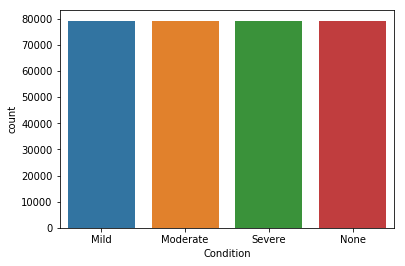

In [19]:
sns.countplot(df['Condition'])

# Preprocessing

In [20]:
df.drop("Country",axis=1,inplace=True)

In [21]:
df.drop(severity_columns,axis=1,inplace=True)

In [22]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [23]:
df.shape

(316800, 24)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

In [25]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,9
5,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,9
6,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,3,9
7,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,3,9
8,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,3,9
9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,2,9


# Feature Engineering

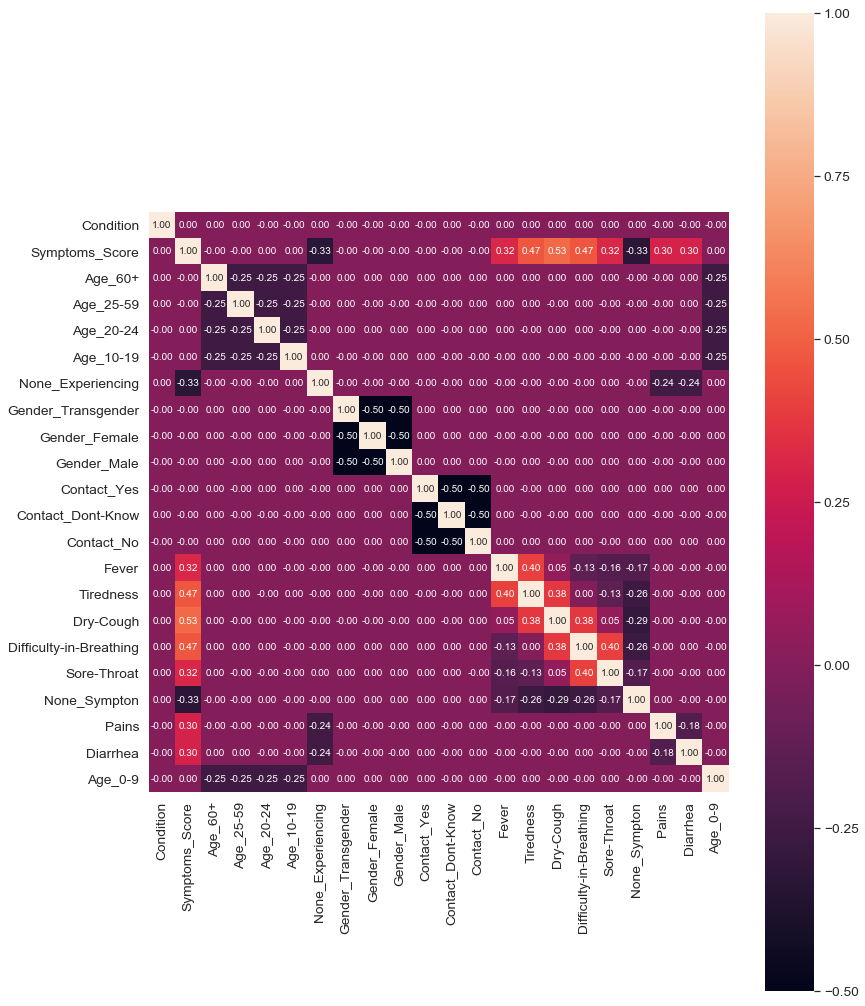

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model

In [27]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

- Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)

In [30]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
pred=rfc1.predict(X_test)

In [32]:
pred

array([1, 3, 2, ..., 3, 3, 1])

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.23216540404040403


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1847, 1160, 6180, 6788],
       [2055, 1011, 6222, 6621],
       [2074, 1181, 5713, 6789],
       [2144, 1154, 6282, 6139]], dtype=int64)

- Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2396622474747475

In [38]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

mb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
y_pred_mb = mb.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_mb)

0.24141414141414141

- Neural network

In [41]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_train.shape

Using TensorFlow backend.


(253440, 4)

In [42]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [43]:
model=keras.models.Sequential()
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))

W1110 14:07:54.861363 10372 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, verbose=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred